<a href="https://colab.research.google.com/github/okiromosh/Learning-Python-Data/blob/main/Python_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visulaizing Data using matplotlib**

In [ ]:
!pip install datasets

In [5]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

importing matplotlib

In [6]:
import matplotlib.pyplot as plt


**Plotting Data**

Plotting job post dates

In [7]:
#df.job_posted_date.head()
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index() # sort/organize the dates in ascendig

In [8]:
date_counts

,count
job_posted_date,
2023-01-01 00:00:04,1
2023-01-01 00:00:07,1
2023-01-01 00:00:22,1
2023-01-01 00:00:24,1
2023-01-01 00:00:27,1
...,...
2023-12-31 23:40:18,2
2023-12-31 23:40:22,2
2023-12-31 23:40:31,2


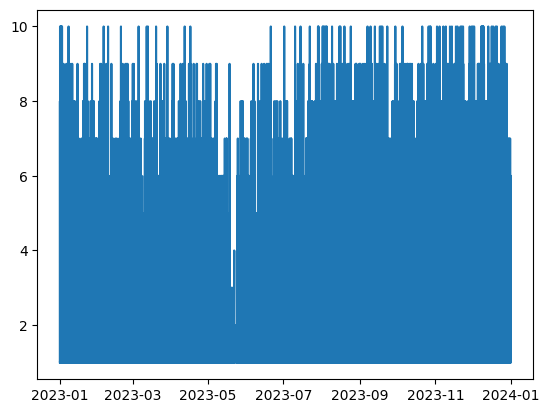

In [9]:
plt.plot(date_counts.index, date_counts)

Aggrigating by month

In [10]:
df['job_posted_month'] = df['job_posted_date'].dt.month # create a new col pulling months from job_posted_date

In [11]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


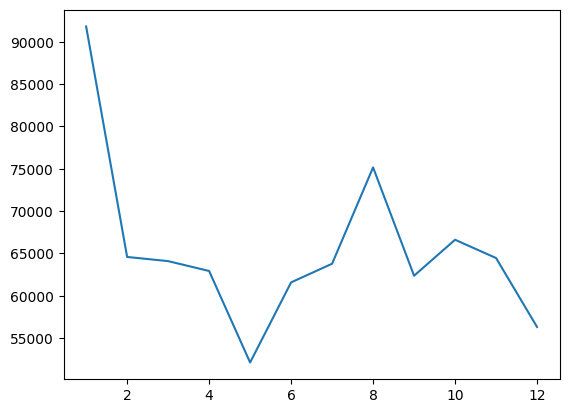

In [12]:
plt.plot(monthly_counts.index, monthly_counts.values)

**Bar Chart - Count of Job Posting**

In [13]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

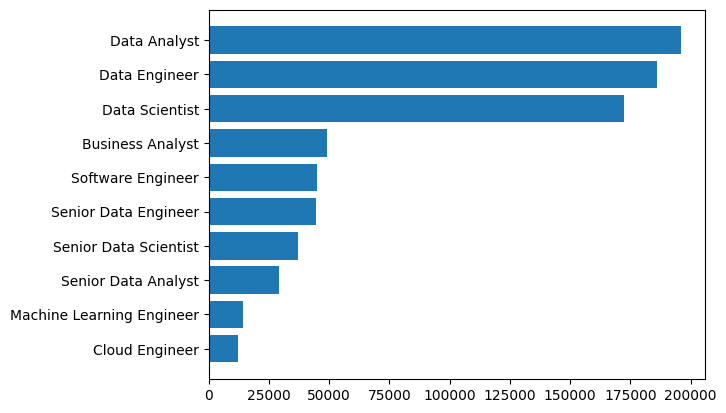

In [14]:
job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts)

# **Labeling in Matplotlib**

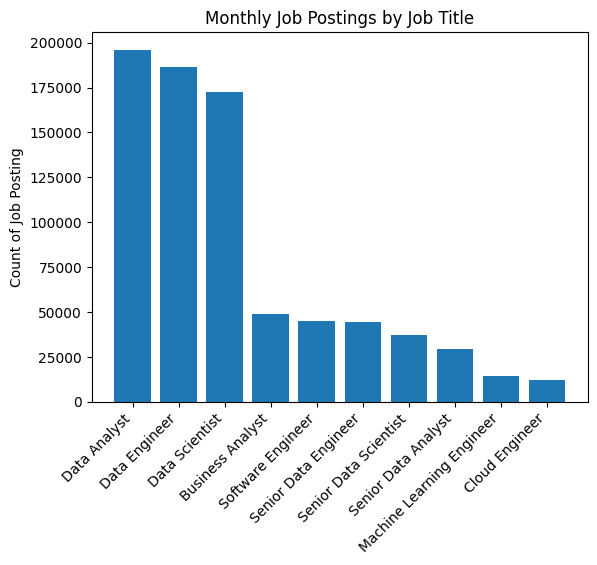

In [15]:
job_counts = job_counts.sort_values(ascending=False)
plt.bar(job_counts.index, job_counts)
plt.title('Monthly Job Postings by Job Title')
plt.ylabel('Count of Job Posting')
plt.xticks(rotation=45, ha='right')
plt.show()

**Ploting with Pandas**

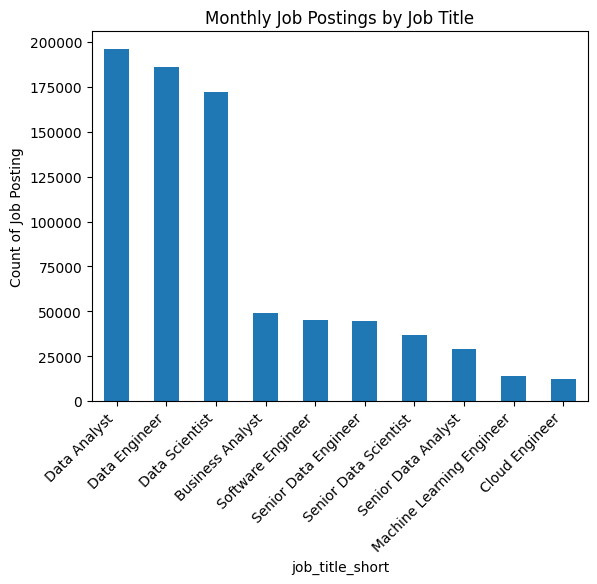

In [16]:
job_counts.plot(kind='bar')
plt.title('Monthly Job Postings by Job Title')
plt.ylabel('Count of Job Posting')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


In [ ]:
#df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

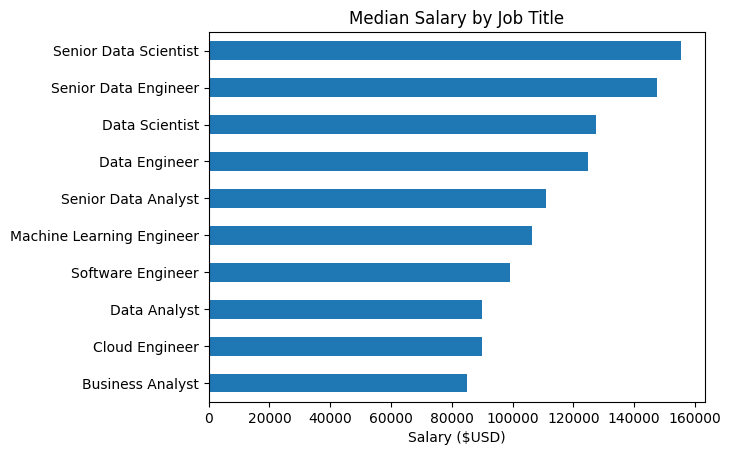

In [29]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()
job_salary.plot(kind='barh')
plt.title('Median Salary by Job Title')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.show()